In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
upload = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
import pandas as pd
df = pd.read_csv(list(upload.keys())[0])

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


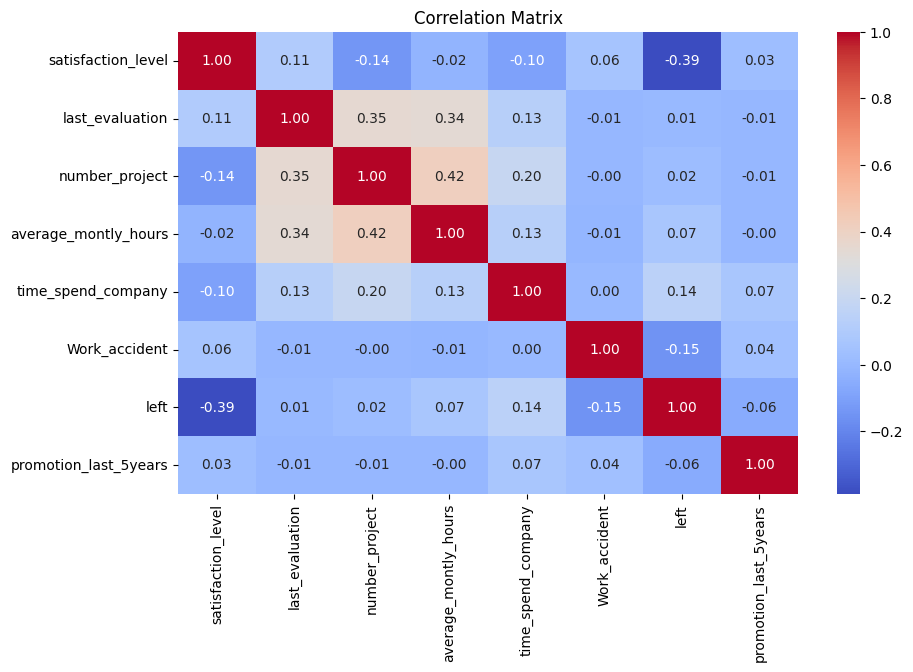

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The variable satisfaction_level is negatively correlated with employee attrition, suggesting that lower satisfaction is associated with employees leaving.

time_spend_company shows a moderate positive correlation with attrition, implying that employees who spend more years at the company may leave more often.

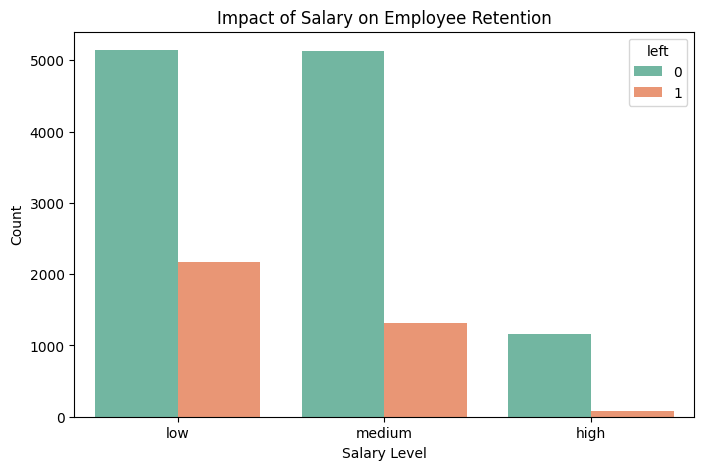

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary', hue='left', palette='Set2')
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.show()

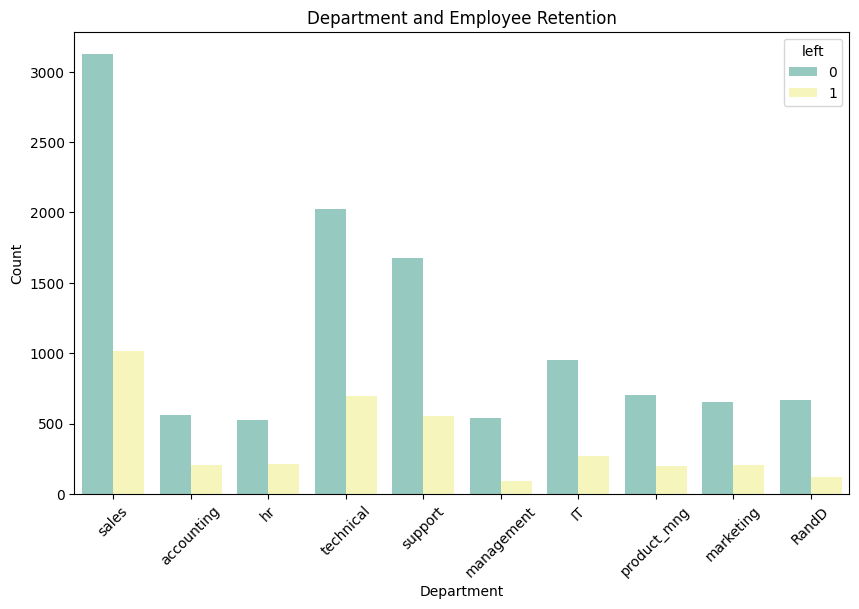

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='left', palette='Set3')
plt.title("Department and Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident',  'promotion_last_5years']]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
6723,0.65,0.96,5,226,2,1,0
6473,0.88,0.80,3,166,2,0,0
4679,0.69,0.98,3,214,2,0,0
862,0.41,0.47,2,154,3,0,0
7286,0.87,0.76,5,254,2,1,0
...,...,...,...,...,...,...,...
3456,0.24,0.87,5,268,5,0,0
11768,0.80,0.84,4,242,2,1,0
3271,0.55,0.51,4,155,3,0,0
4940,0.99,0.71,4,232,3,0,0


In [ ]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
12100,0.38,0.52,2,154,3,0,0
6230,0.56,0.81,3,165,4,0,0
14456,0.45,0.46,2,155,3,0,0
12143,0.37,0.47,2,152,3,0,0
9047,0.77,0.79,3,273,2,0,0
...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0
13418,0.49,0.65,4,233,7,0,0
5390,0.66,0.73,5,249,2,0,0
860,0.79,1.00,4,218,5,0,0


In [ ]:
y_test

,left
6723,0
6473,0
4679,0
862,1
7286,0
...,...
3456,0
11768,0
3271,0
4940,0


In [ ]:
y_train

,left
12100,1
6230,0
14456,1
12143,1
9047,0
...,...
5191,0
13418,0
5390,0
860,1


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.7636666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      9154
           1       0.50      0.25      0.33      2846

    accuracy                           0.76     12000
   macro avg       0.65      0.59      0.59     12000
weighted avg       0.73      0.76      0.73     12000



Assignment 2

GRADIENT DESCENT WITH MACHINE LEARNING

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
from google.colab import files
upload = files.upload()


Saving insurance_data (1) (1).csv to insurance_data (1) (1).csv


In [46]:
import pandas as pd
df = pd.read_csv(list(upload.keys())[0])
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, train_size=0.8)

In [49]:
x_test

,age,affordibility
18,19,0
1,25,0
11,28,1
24,50,1
20,21,1
25,54,1


In [50]:
x_test

,age,affordibility
18,19,0
1,25,0
11,28,1
24,50,1
20,21,1
25,54,1


In [51]:
y_train

,bought_insurance
21,0
12,0
5,1
10,0
14,1
26,0
9,1
0,0
19,0
22,1


In [52]:
y_test

,bought_insurance
18,0
1,0
11,0
24,1
20,0
25,1


In [53]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age'] / 100
x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age'] / 100

In [54]:
x_train_scaled['intercept'] = 1
x_test_scaled['intercept'] = 1

In [55]:
X_train = x_train_scaled[['intercept', 'age', 'affordibility']].values
y_train = y_train.values
X_test = x_test_scaled[['intercept', 'age', 'affordibility']].values
y_test = y_test.values

In [56]:
weights = np.zeros(X_train.shape[1])

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [58]:
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [59]:
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []
    for epoch in range(epochs):
        # Calculate the predictions
        predictions = sigmoid(np.dot(X, weights))

        # Compute the gradient
        gradients = (1/m) * np.dot(X.T, (predictions - y))

        # Update the weights
        weights -= learning_rate * gradients

        # Record the cost every 100 epochs (for visualization)
        if epoch % 100 == 0:
            cost_history.append(cost_function(X, y, weights))

    return weights, cost_history

In [66]:

# Set hyperparameters for gradient descent
learning_rate = 0.01
epochs = 5000



In [67]:
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

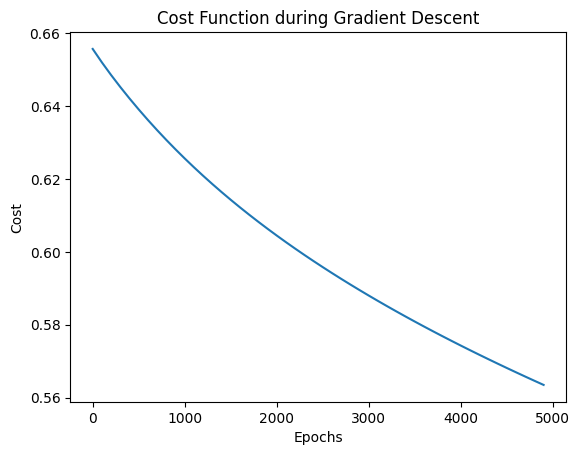

In [68]:
plt.plot(range(0, epochs, 100), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()

In [69]:
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return [1 if i >= 0.5 else 0 for i in predictions]

In [70]:
predictions = predict(X_test, weights)

In [71]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 66.67%
